### Characteristics of Kernel Function
Kernel functions used in machine learning, including in SVMs (Support Vector Machines), have several important characteristics, including:

- Transformation: Kernels allow SVMs to operate in a higher-dimensional space without explicitly mapping the data into that space. This makes it possible to capture complex relationships between data points.
- Mercer's condition: A kernel function must satisfy Mercer's condition to be valid. This condition ensures that the kernel function is positive semi definite, which means that it is always greater than or equal to zero.
- Positive definiteness: A kernel function is positive definite if it is always greater than zero except for when the inputs are equal to each other.
- Non-negativity: A kernel function is non-negative, meaning that it produces non-negative values for all inputs.
- Symmetry: A kernel function is symmetric, meaning that it produces the same value regardless of the order in which the inputs are given.
- Reproducing property: A kernel function satisfies the reproducing property if it can be used to reconstruct the input data in the feature space.
- Smoothness: A kernel function is said to be smooth if it produces a smooth transformation of the input data into the feature space.
- Complexity: The complexity of a kernel function is an important consideration, as more complex kernel functions may lead to over fitting and reduced generalization performance.

### Hard and soft Margin

Hard margin SVM aims to find a hyperplane that perfectly separates the data into different classes without allowing any misclassifications. This means that all data points must be correctly classified, and there must be no data points within the margin. The goal is to maximize the margin between the classes, which is the distance between the hyperplane and the closest data points (support vectors).

- When to use: Hard margin SVM is suitable when the data is linearly separable, meaning there is a clear boundary that can perfectly divide the classes.

- Advantages: Provides a clear and precise decision boundary with no misclassifications.

- Disadvantages: Highly sensitive to outliers and noise. If the data is not perfectly separable, the hard margin SVM may fail to find a solution.

Mathematically, the optimization problem for hard margin SVM is:

\begin{align}
\min_{\mathbf{w}, b} & \quad \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to} & \quad y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \ge 1 \quad \forall i
\end{align}


##### Soft Margin SVM
Soft margin SVM introduces some flexibility by allowing a certain degree of misclassification. Instead of requiring a perfect separation, it aims to find a balance between maximizing the margin and minimizing the classification error. This is achieved by introducing slack variables (
𝜉
𝑖
) that measure the degree of misclassification for each data point.

- When to use: Soft margin SVM is suitable when the data is not linearly separable, allowing the algorithm to tolerate some misclassified data points.

- Advantages: More robust to noise and outliers. It can handle cases where the data is not perfectly separable.

- Disadvantages: Requires tuning of the penalty parameter (C), which controls the trade-off between maximizing the margin and minimizing the classification error.

Mathematically, the optimization problem for soft margin SVM is:

\begin{align}
\min_{\mathbf{w}, b, \xi} & \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i \\
\text{subject to} & \quad y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \ge 1 - \xi_i \quad \forall i \\
& \quad \xi_i \ge 0
\end{align}


### How to control margin??

##### 1. Penalty Parameter (C)
The penalty parameter, often denoted as 
𝐶
, plays a crucial role in controlling the margin in soft margin SVM. It determines the trade-off between maximizing the margin and minimizing the classification error.

- High 
𝐶
 value: A higher value of 
𝐶
 puts more emphasis on minimizing classification errors, leading to a smaller margin. The SVM will try to classify all training examples correctly, which can lead to overfitting.

- Low 
𝐶
 value: A lower value of 
𝐶
 puts less emphasis on classification errors, allowing for a larger margin. The SVM will tolerate more misclassifications, which can lead to better generalization.

##### 2. Kernel Function
The choice of the kernel function also affects the margin. Different kernel functions can transform the data into higher-dimensional spaces in various ways, influencing the margin.

- Linear Kernel: Suitable for linearly separable data. The margin is a straight line (or hyperplane).

- Polynomial and RBF Kernels: Suitable for non-linear data. These kernels can create more complex decision boundaries, affecting the margin's shape and size.

##### 3. Slack Variables (𝜉)
In soft margin SVM, slack variables 
𝜉
𝑖
 are introduced to allow for some misclassification. The value of these slack variables affects the margin:

- Higher Slack Variables: Allow more data points to be within the margin or misclassified, leading to a larger margin.

- Lower Slack Variables: Strive to classify more data points correctly, leading to a smaller margin.

### Kernel Parameters

In [3]:
from sklearn import svm

In [4]:
Linearmodel = svm.LinearSVC()

In [ ]:
Parameters
----------
penalty : {'l1', 'l2'}, default='l2'
    Specifies the norm used in the penalization. The 'l2'
    penalty is the standard used in SVC. The 'l1' leads to ``coef_``
    vectors that are sparse.

loss : {'hinge', 'squared_hinge'}, default='squared_hinge'
    Specifies the loss function. 'hinge' is the standard SVM loss
    (used e.g. by the SVC class) while 'squared_hinge' is the
    square of the hinge loss. The combination of ``penalty='l1'``
    and ``loss='hinge'`` is not supported.

dual : "auto" or bool, default="auto"
    Select the algorithm to either solve the dual or primal
    optimization problem. Prefer dual=False when n_samples > n_features.
    `dual="auto"` will choose the value of the parameter automatically,
    based on the values of `n_samples`, `n_features`, `loss`, `multi_class`
    and `penalty`. If `n_samples` < `n_features` and optimizer supports
    chosen `loss`, `multi_class` and `penalty`, then dual will be set to True,
    otherwise it will be set to False.

    .. versionchanged:: 1.3
       The `"auto"` option is added in version 1.3 and will be the default
       in version 1.5.

tol : float, default=1e-4
    Tolerance for stopping criteria.

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive.
    For an intuitive visualization of the effects of scaling
    the regularization parameter C, see
    :ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.

multi_class : {'ovr', 'crammer_singer'}, default='ovr'  #class 1 - class 2 - class 3
    Determines the multi-class strategy if `y` contains more than
    two classes.
    ``"ovr"`` trains n_classes one-vs-rest classifiers, while
    ``"crammer_singer"`` optimizes a joint objective over all classes.
    While `crammer_singer` is interesting from a theoretical perspective
    as it is consistent, it is seldom used in practice as it rarely leads
    to better accuracy and is more expensive to compute.
    If ``"crammer_singer"`` is chosen, the options loss, penalty and dual
    will be ignored.

fit_intercept : bool, default=True
    Whether or not to fit an intercept. If set to True, the feature vector
    is extended to include an intercept term: `[x_1, ..., x_n, 1]`, where
    1 corresponds to the intercept. If set to False, no intercept will be
    used in calculations (i.e. data is expected to be already centered).

intercept_scaling : float, default=1.0
    When `fit_intercept` is True, the instance vector x becomes ``[x_1,
    ..., x_n, intercept_scaling]``, i.e. a "synthetic" feature with a
    constant value equal to `intercept_scaling` is appended to the instance
    vector. The intercept becomes intercept_scaling * synthetic feature
    weight. Note that liblinear internally penalizes the intercept,
    treating it like any other term in the feature vector. To reduce the
    impact of the regularization on the intercept, the `intercept_scaling`
    parameter can be set to a value greater than 1; the higher the value of
    `intercept_scaling`, the lower the impact of regularization on it.
    Then, the weights become `[w_x_1, ..., w_x_n,
    w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` represent
    the feature weights and the intercept weight is scaled by
    `intercept_scaling`. This scaling allows the intercept term to have a
    different regularization behavior compared to the other features.

class_weight : dict or 'balanced', default=None
    Set the parameter C of class i to ``class_weight[i]*C`` for
    SVC. If not given, all classes are supposed to have
    weight one.
    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``.

verbose : int, default=0
    Enable verbose output. Note that this setting takes advantage of a
    per-process runtime setting in liblinear that, if enabled, may not work
    properly in a multithreaded context.

random_state : int, RandomState instance or None, default=None
    Controls the pseudo random number generation for shuffling the data for
    the dual coordinate descent (if ``dual=True``). When ``dual=False`` the
    underlying implementation of :class:`LinearSVC` is not random and
    ``random_state`` has no effect on the results.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

max_iter : int, default=1000
    The maximum number of iterations to be run.


### Primal vs. Dual Formulation

##### Primal Formulation
In the primal formulation, we aim to find the weight vector 
𝑤
 and bias 
𝑏
 that define the hyperplane separating the classes. The optimization problem for a soft margin SVM is:

\begin{align}
\min_{\mathbf{w}, b, \xi} & \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i \\
\text{subject to} & \quad y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \ge 1 - \xi_i \quad \forall i \\
& \quad \xi_i \ge 0
\end{align}


##### Dual Formulation

In the dual formulation, we aim to find the dual variables (also called Lagrange multipliers) 
𝛼
𝑖
 instead of directly finding 
𝑤
 and 
𝑏
. The dual formulation leverages the concept of Lagrange multipliers to transform the primal problem into its dual form. This transformation has several advantages, including the ability to handle non-linear kernels.

The dual optimization problem is:

\begin{align}
\max_{\alpha} & \quad \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to} & \quad 0 \le \alpha_i \le C \quad \forall i \\
& \quad \sum_{i=1}^{n} \alpha_i y_i = 0
\end{align}


Objective Function: The goal is to maximize the objective function, which includes the dual variables 
𝛼
𝑖
, the labels 
𝑦
𝑖
 and 
𝑦
𝑗
, and the kernel function 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
.

### Working of Dual Parameters
- Lagrange Multipliers (Dual Variables): The dual variables 
𝛼
𝑖
 are introduced to convert the constrained optimization problem into a form that is easier to solve, especially when using kernel functions.

- Kernel Trick: The dual formulation allows the use of the kernel trick. Instead of explicitly transforming the data into a higher-dimensional space, we use a kernel function 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
 to compute the inner product in that space. This makes it computationally efficient to handle non-linear decision boundaries.

- Support Vectors: In the dual formulation, only a subset of the training data points (those with non-zero 
𝛼
𝑖
) contribute to defining the decision boundary. These points are called support vectors. The decision boundary is determined by these support vectors and their corresponding dual variables.

- Decision Function: Once the dual variables are found, the decision function can be expressed as:

$$ f(\mathbf{x}) = \sum_{i=1}^{n} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b $$

where, 
𝑓
(
𝑥
)
 is the decision function.

𝛼
𝑖
 are the dual variables (Lagrange multipliers).

𝑦
𝑖
 are the class labels of the training data.

𝐾
(
𝑥
𝑖
,
𝑥
)
 is the kernel function.

𝑏
 is the bias term.
 
- This function determines which side of the hyperplane a new data point 
𝑥
 lies on.

Optimization: The dual problem is a quadratic programming problem, which can be efficiently solved using numerical optimization techniques. Solving the dual problem provides the optimal values of 
𝛼
𝑖
, which are then used to compute the weight vector 
𝑤
 and bias 
𝑏
.

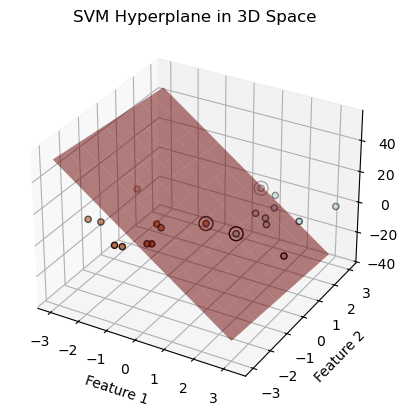

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Generate some 3D linearly separable data
np.random.seed(0)
X = np.random.randn(20, 3)
y = np.array([0]*10 + [1]*10)
X[:10] += 1
X[10:] -= 1

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[2]
b = -w[1] / w[2]
xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
zz = a * xx + b * yy - (clf.intercept_[0]) / w[2]  #y = m1x1+m2x2+c

# Plot the data points and the hyperplane in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=100, facecolors='none', edgecolors='k')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM Hyperplane in 3D Space')
plt.show()


In [7]:
X

array([[ 2.76405235,  1.40015721,  1.97873798],
       [ 3.2408932 ,  2.86755799,  0.02272212],
       [ 1.95008842,  0.84864279,  0.89678115],
       [ 1.4105985 ,  1.14404357,  2.45427351],
       [ 1.76103773,  1.12167502,  1.44386323],
       [ 1.33367433,  2.49407907,  0.79484174],
       [ 1.3130677 ,  0.14590426, -1.55298982],
       [ 1.6536186 ,  1.8644362 ,  0.25783498],
       [ 3.26975462, -0.45436567,  1.04575852],
       [ 0.81281615,  2.53277921,  2.46935877],
       [-0.84505257, -0.62183748, -1.88778575],
       [-2.98079647, -1.34791215, -0.84365103],
       [ 0.23029068,  0.20237985, -1.38732682],
       [-1.30230275, -2.04855297, -2.42001794],
       [-2.70627019,  0.9507754 , -1.50965218],
       [-1.4380743 , -2.25279536, -0.22250964],
       [-2.61389785, -1.21274028, -1.89546656],
       [-0.6130975 , -1.51080514, -2.18063218],
       [-1.02818223, -0.57166813, -0.93348278],
       [-0.6975281 , -1.63432209, -1.36274117]])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
w

array([-1.8767181 , -0.15757929, -0.13985001])

In [10]:
a, b

(-13.419506471221124, -1.1267735454576457)

In [11]:
xx

array([[-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667

In [12]:
yy

array([[-3.        , -3.        , -3.        , -3.        , -3.        ,
        -3.        , -3.        , -3.        , -3.        , -3.        ],
       [-2.33333333, -2.33333333, -2.33333333, -2.33333333, -2.33333333,
        -2.33333333, -2.33333333, -2.33333333, -2.33333333, -2.33333333],
       [-1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667,
        -1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        

In [13]:
zz

array([[ 52.72001665,  43.77367901,  34.82734136,  25.88100371,
         16.93466606,   7.98832842,  -0.95800923,  -9.90434688,
        -18.85068453, -27.79702217],
       [ 51.96883429,  43.02249664,  34.076159  ,  25.12982135,
         16.1834837 ,   7.23714605,  -1.70919159, -10.65552924,
        -19.60186689, -28.54820454],
       [ 51.21765193,  42.27131428,  33.32497663,  24.37863898,
         15.43230134,   6.48596369,  -2.46037396, -11.40671161,
        -20.35304925, -29.2993869 ],
       [ 50.46646956,  41.52013192,  32.57379427,  23.62745662,
         14.68111897,   5.73478133,  -3.21155632, -12.15789397,
        -21.10423162, -30.05056926],
       [ 49.7152872 ,  40.76894955,  31.8226119 ,  22.87627426,
         13.92993661,   4.98359896,  -3.96273869, -12.90907633,
        -21.85541398, -30.80175163],
       [ 48.96410484,  40.01776719,  31.07142954,  22.12509189,
         13.17875425,   4.2324166 ,  -4.71392105, -13.6602587 ,
        -22.60659634, -31.55293399],
       [ 4

In [15]:
numodel =svm.NuSVC()

In [ ]:
Parameters
----------
nu : float, default=0.5
    An upper bound on the fraction of margin errors (see :ref:`User Guide
    <nu_svc>`) and a lower bound of the fraction of support vectors.
    Should be in the interval (0, 1].

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
    Specifies the kernel type to be used in the algorithm.
    If none is given, 'rbf' will be used. If a callable is given it is
    used to precompute the kernel matrix. For an intuitive
    visualization of different kernel types see
    :ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.

degree : int, default=3
    Degree of the polynomial kernel function ('poly').
    Must be non-negative. Ignored by all other kernels.

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features
    - if float, must be non-negative.

    .. versionchanged:: 0.22
       The default value of ``gamma`` changed from 'auto' to 'scale'.

coef0 : float, default=0.0
    Independent term in kernel function.
    It is only significant in 'poly' and 'sigmoid'.

shrinking : bool, default=True
    Whether to use the shrinking heuristic.
    See the :ref:`User Guide <shrinking_svm>`.

probability : bool, default=False
    Whether to enable probability estimates. This must be enabled prior
    to calling `fit`, will slow down that method as it internally uses
    5-fold cross-validation, and `predict_proba` may be inconsistent with
    `predict`. Read more in the :ref:`User Guide <scores_probabilities>`.

tol : float, default=1e-3
    Tolerance for stopping criterion.

cache_size : float, default=200
    Specify the size of the kernel cache (in MB).

class_weight : {dict, 'balanced'}, default=None
    Set the parameter C of class i to class_weight[i]*C for
    SVC. If not given, all classes are supposed to have
    weight one. The "balanced" mode uses the values of y to automatically
    adjust weights inversely proportional to class frequencies as
    ``n_samples / (n_classes * np.bincount(y))``.

verbose : bool, default=False
    Enable verbose output. Note that this setting takes advantage of a
    per-process runtime setting in libsvm that, if enabled, may not work
    properly in a multithreaded context.

max_iter : int, default=-1
    Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape : {'ovo', 'ovr'}, default='ovr'
    Whether to return a one-vs-rest ('ovr') decision function of shape
    (n_samples, n_classes) as all other classifiers, or the original
    one-vs-one ('ovo') decision function of libsvm which has shape
    (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one
    ('ovo') is always used as multi-class strategy. The parameter is
    ignored for binary classification.

    
break_ties : bool, default=False
    If true, ``decision_function_shape='ovr'``, and number of classes > 2,
    :term:`predict` will break ties according to the confidence values of
    :term:`decision_function`; otherwise the first class among the tied
    classes is returned. Please note that breaking ties comes at a
    relatively high computational cost compared to a simple predict.

    .. versionadded:: 0.22

random_state : int, RandomState instance or None, default=None
    Controls the pseudo random number generation for shuffling the data for
    probability estimates. Ignored when `probability` is False.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.
